In [20]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [21]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

In [22]:
# Load  the MNIST dataset
full_data = datasets.MNIST(root='./data', transform=transform, download=True)
train = int(0.8 * len(full_data))
test = len(full_data) - train
train_data, test_data = random_split(full_data, [train, test])
train_loader = DataLoader(dataset=train_data, shuffle=True)
test_loader = DataLoader(dataset=test_data, shuffle=True)


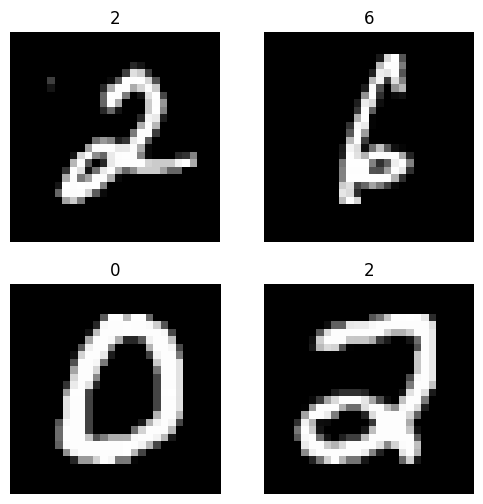

In [23]:
# Data Visualization
figure = plt.figure(figsize=(6, 6))
cols, rows = 2, 2
for i in range(cols * rows):
    sample_idx = torch.randint(len(train_loader.dataset), size=(1,)).item()
    img, label = train_loader.dataset[sample_idx]
    figure.add_subplot(rows, cols, i + 1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [24]:

class FeedForwardNetwork(torch.nn.Module):
    def __init__(self, in_dim, embedding_dim=128, out_dim=10):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(in_dim, embedding_dim),
            nn.ReLU(),
            nn.Linear(embedding_dim, out_dim),
        )

    def forward(self, x):
        x = torch.flatten(x)
        return self.linear(x)


# Model creation
in_dim = (train_loader.dataset[0][0].size()[1]) ** 2
model = FeedForwardNetwork(in_dim=in_dim, out_dim=10, embedding_dim=128)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training
for epoch in range(5):
    loss = 0
    for images, labels in train_loader.dataset:
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, torch.tensor(labels))
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')
print("Finished Training!")

Epoch: 1, Loss: 0.2541
Epoch: 2, Loss: 0.2259
Epoch: 3, Loss: 0.1923
Epoch: 4, Loss: 0.0717
Epoch: 5, Loss: 0.0537
Finished Training!


In [25]:
# Prediction using created model.
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader.dataset:
        outputs = model.forward(images)
        predicted = torch.argmax(outputs)
        total += 1
        if predicted == labels:
            correct += 1
    print(f'Accuracy: {(correct / total) * 100}%')

Accuracy: 97.15%


In [26]:
# Saving the model
path = "./model/two_layer_linear_model.pth"
torch.save(model.state_dict(), path )